In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("house_price.csv")
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [4]:
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
df.isnull().sum()


location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [ ]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df['price_per_sqft'].describe()


count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [ ]:
### Mean ± Std Deviation Method
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
df_mean_std = df[(df['price_per_sqft'] >= mean - 2*std) & (df['price_per_sqft'] <= mean + 2*std)]
df_mean_std['price_per_sqft'].describe()


count     13195.000000
mean       6714.131123
std        4876.715543
min         267.829813
25%        4267.062384
50%        5434.782609
75%        7313.543844
max      200000.000000
Name: price_per_sqft, dtype: float64

In [ ]:
###Percentile Method (5th & 95th Percentile)
low = df['price_per_sqft'].quantile(0.05)
high = df['price_per_sqft'].quantile(0.95)
df_percentile = df[(df['price_per_sqft'] >= low) & (df['price_per_sqft'] <= high)]
df_percentile['price_per_sqft'].describe()


count    11880.000000
mean      6134.950294
std       2505.686851
min       3108.888889
25%       4380.912264
50%       5438.331478
75%       7025.261708
max      15311.004785
Name: price_per_sqft, dtype: float64

In [ ]:
###  IQR Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_iqr = df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]
df_iqr['price_per_sqft'].describe()


count    11935.000000
mean      5576.354939
std       1957.791761
min        267.829813
25%       4166.666667
50%       5188.679245
75%       6603.342943
max      11875.000000
Name: price_per_sqft, dtype: float64

In [ ]:
### Z-Score Method
z_scores = zscore(df['price_per_sqft'])
df_z = df[(np.abs(z_scores) < 3)]
df_z['price_per_sqft'].describe()


count     13195.000000
mean       6714.131123
std        4876.715543
min         267.829813
25%        4267.062384
50%        5434.782609
75%        7313.543844
max      200000.000000
Name: price_per_sqft, dtype: float64

### Box Plot for All Methods


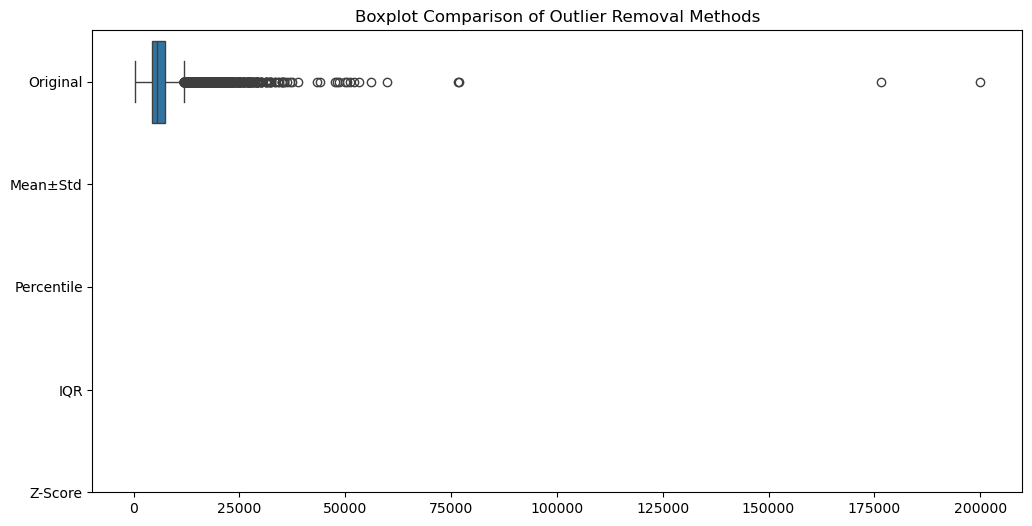

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=[df['price_per_sqft'], df_mean_std['price_per_sqft'],
                  df_percentile['price_per_sqft'], df_iqr['price_per_sqft'], df_z['price_per_sqft']],
            orient="h")
plt.xticks(rotation=0)
plt.yticks([0,1,2,3,4], ['Original','Mean±Std','Percentile','IQR','Z-Score'])
plt.title("Boxplot Comparison of Outlier Removal Methods")
plt.show()


### Histogram Before Transformation

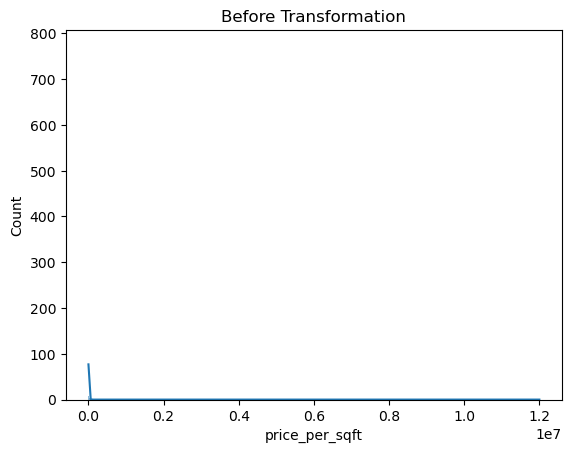

Skewness: 108.26875399964703
Kurtosis: 12090.634145107531


In [ ]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Before Transformation")
plt.show()

print("Skewness:", skew(df['price_per_sqft']))
print("Kurtosis:", kurtosis(df['price_per_sqft']))


### log transformation

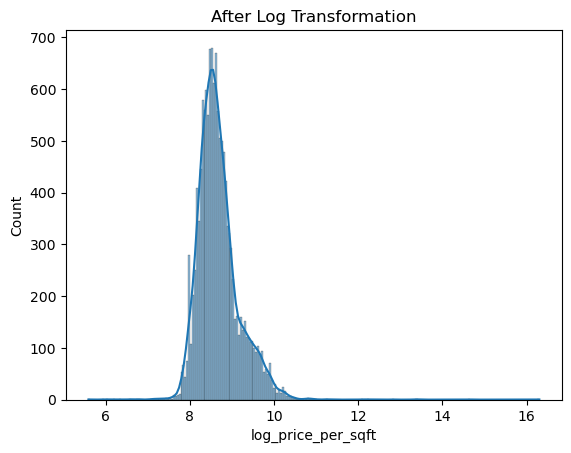

Skewness: 1.400591506829899
Kurtosis: 9.204063649006573


In [20]:
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title("After Log Transformation")
plt.show()

print("Skewness:", skew(df['log_price_per_sqft']))
print("Kurtosis:", kurtosis(df['log_price_per_sqft']))


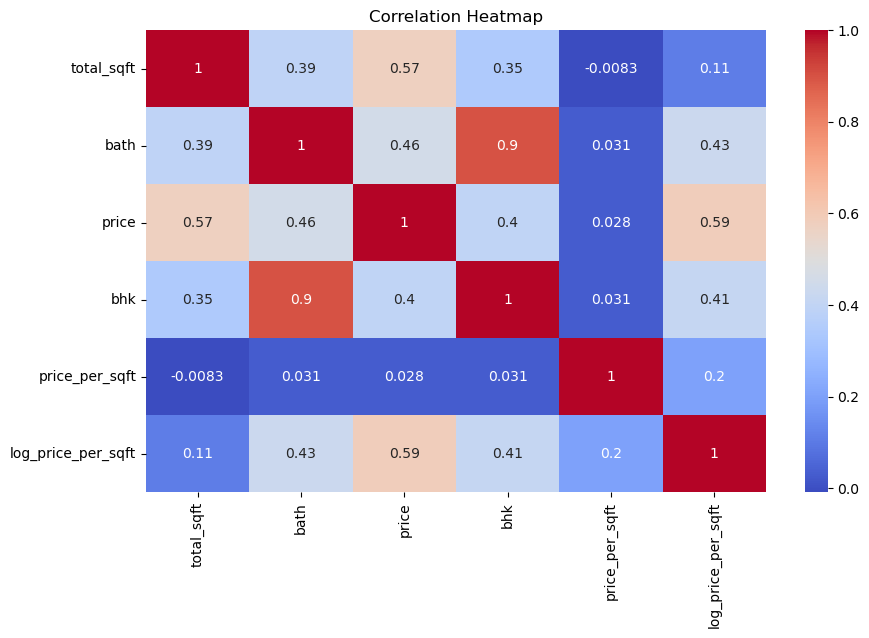

In [22]:
###  Correlation Heatmap
numerical_cols = df.select_dtypes(include=[np.number])
correlation = numerical_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Scatter Plot Matrix

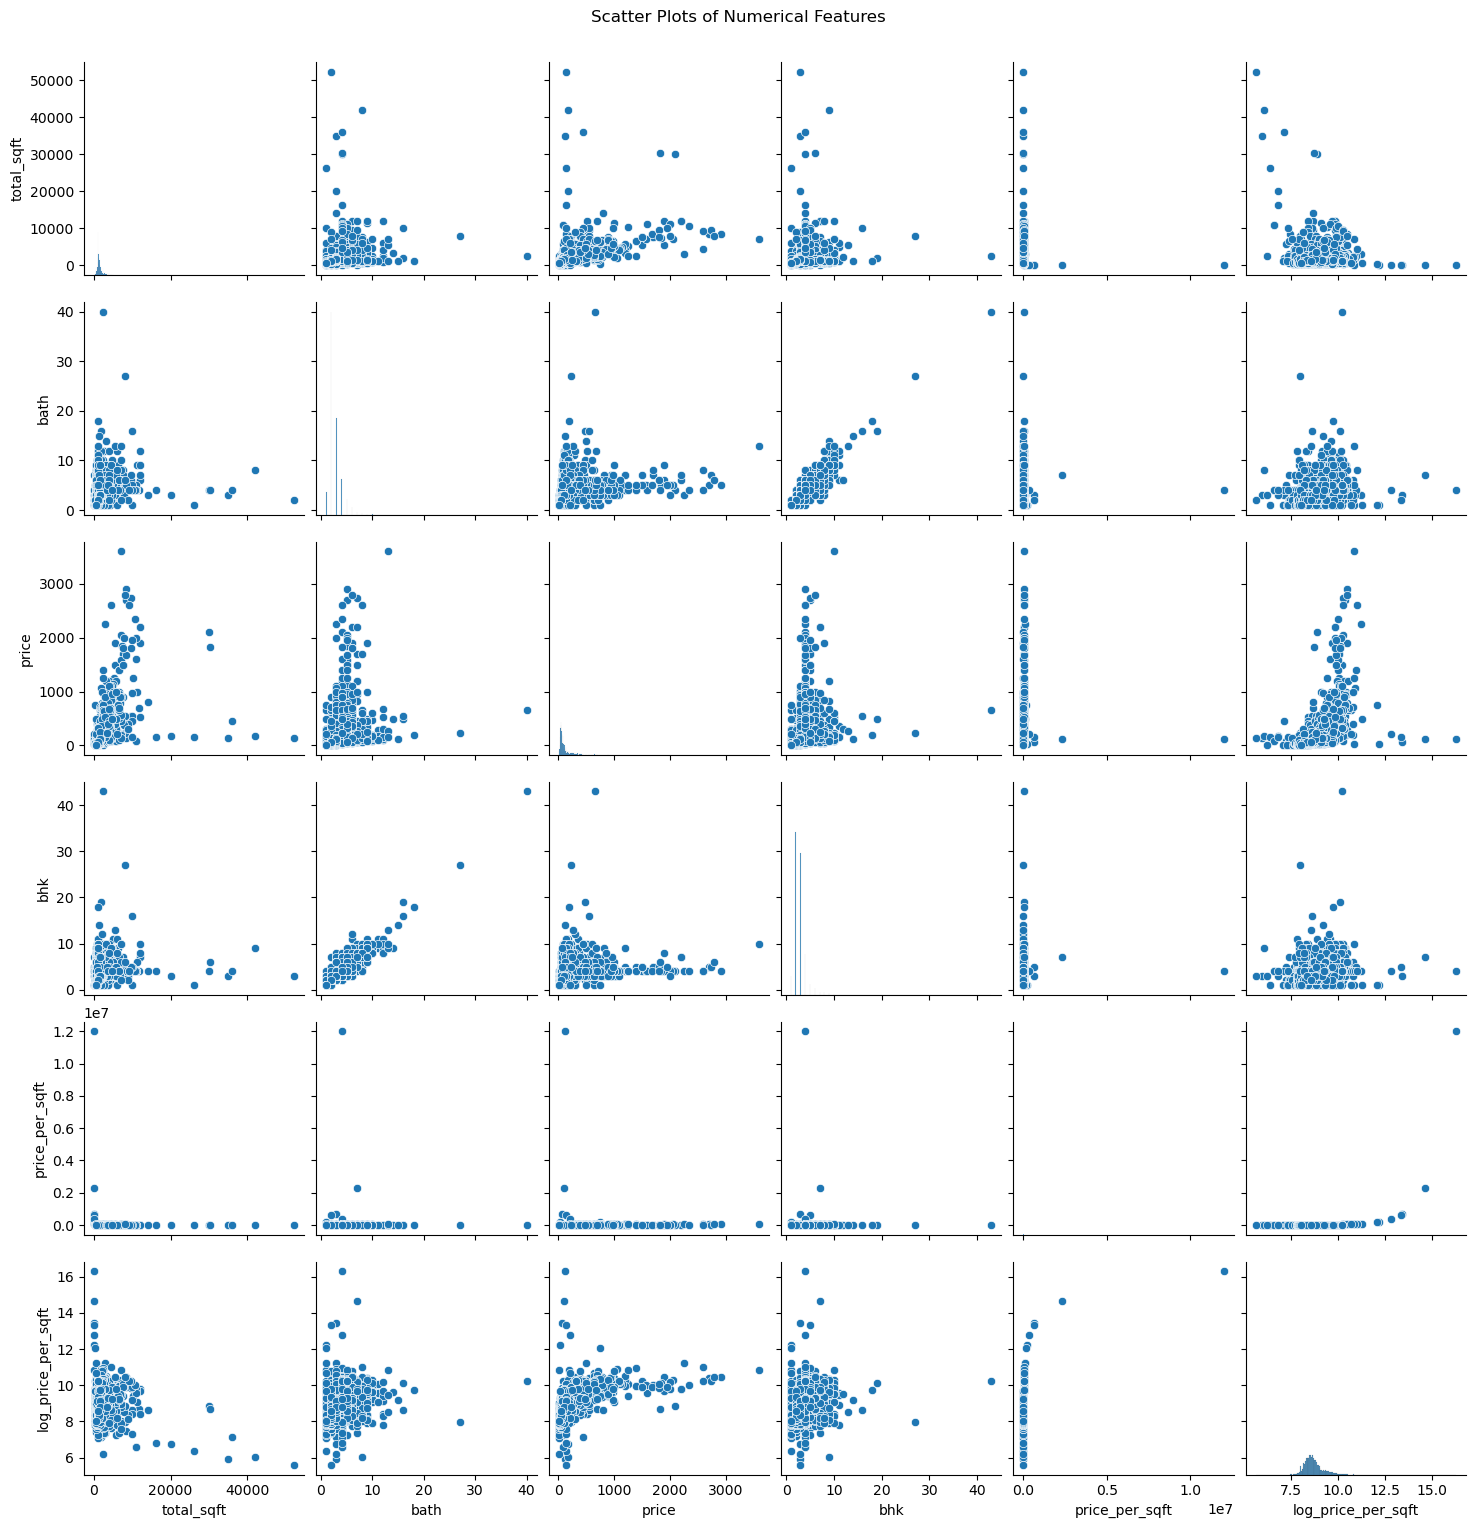

In [24]:
sns.pairplot(numerical_cols)
plt.suptitle("Scatter Plots of Numerical Features", y=1.02)
plt.show()
